In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv.imread('./train/100f71902.jpg')

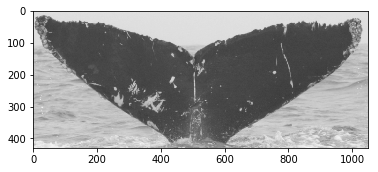

In [7]:
plt.imshow(img)

In [226]:
grayscaled = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

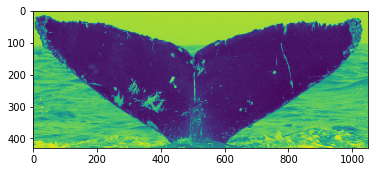

In [227]:
plt.imshow(grayscaled)

In [228]:
sift = cv.xfeatures2d.SIFT_create(1000)
keypoints = sift.detect(grayscaled,None)

In [229]:
img=cv.drawKeypoints(img,keypoints,outImage=np.array([]),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imsave('sift_explicit.png',img)

In [230]:
img=cv.drawKeypoints(grayscaled,keypoints,outImage=np.array([]))
plt.imsave('sift_points',img)

In [231]:
surf = cv.xfeatures2d.SURF_create(900)
# graysca
kp, des = surf.detectAndCompute(grayscaled,None)

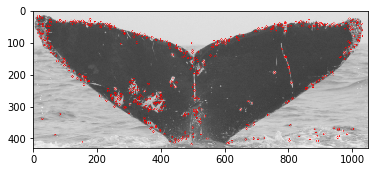

In [232]:
img2 = cv.drawKeypoints(gr,kp,None,(255,0,0),0)
plt.imshow(img2)
# print(des)

In [233]:
img = cv.imread('./train/100f71902.jpg',0)
edges = cv.Canny(img,0,300)

In [2]:
plt.imshow(edges,cmap = 'gray')

NameError: name 'plt' is not defined

26

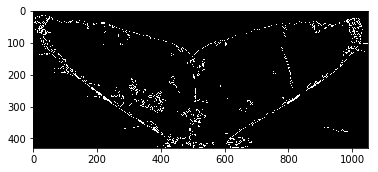

In [8]:
import matplotlib.cm as cmap
ed = cv.Canny(img,0,300,apertureSize = 3)
minLineLength = 5
maxLineGap = 1
lines = cv.HoughLinesP(ed,1,np.pi/180,100,minLineLength,maxLineGap)
new_img = np.zeros(ed.shape[:2])
for l in lines:
    for x1,y1,x2,y2 in l:
        cv.line(ed,(x1,y1),(x2,y2),(255,0,0),4)

plt.imshow(ed,cmap=cmap.gray)
len(lines)

In [236]:
new_img = np.zeros(ed.shape[:2])
h_r = 10
w_r = 10
h , w = ed.shape[:2]
for y in range(h):
    for x in range(w):
        if ed[y,x] == 255:
            for i in range(max(0,y+h_r),min(y+h_r,h)):
                for j in range(max(0,x+w_r),min(x+w_r,w)):
                    if ed[i,j] != 0:
                        cv.line(ed,(y,x),(i,j),255,1)
                        print(True)

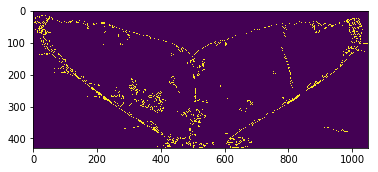

In [237]:
plt.imshow(ed)

In [238]:
sobel_horizontal = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

# plt.imshow(img)
# plt.imshow(sobel_horizontal,cmap=cmap.gray)
# plt.imshow(sobel_vertical,cmap=cmap.gray)
border = cv.borderInterpolate(0, 1, cv.BORDER_CONSTANT)
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=3, borderType=border)

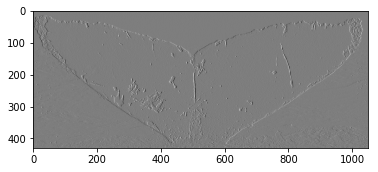

In [239]:
plt.imshow(sobelx64f,cmap=cmap.gray)

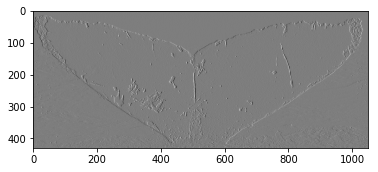

In [255]:
Max = np.max(sobelx64f)
Min = np.min(sobelx64f)
T = (Max+Min)/2
plt.imshow(sobelx64f,cmap=cmap.gray)

In [275]:
retval, threshold = cv.threshold(sobelx64f, 5*T, 255, cv.THRESH_BINARY)

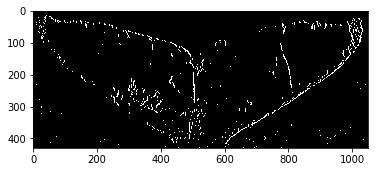

In [276]:
plt.imshow(threshold,cmap=cmap.gray)